# Ion Acoustic Waves, Fluid Theory, Plasma Response, and Kinetic Effects

In this notebook, we use fluid thoery to discuss ion acoustic waves, and compare the theoretical results we obtain with plots made using the PIC code UPIC-ES.

In this project, you will be simulating plasmas with the electrostatic code UPIC-ES.   The normalization of the code is $\omega_p = 1$, and the grid size $\Delta x = 1$.  Therefore, velocity is measured in units of [$\Delta x \omega_p$].


Each plasma electron is initialized with positions (only in x) such that the density is uniform. The ions are initialized at the same positions but with a larger mass ($M_i/m_e = 100$).  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction.  To speed up the simulations, we reduced the separation of the electron and ion timescale by using a reduced ion mass of $M/m=100$.  The kinetic nature of IAW can be explored by adjusting the ratio of $RTEMP = T_e/T_i = (m v_{te}^2)/(M v_{ti}^2)$


The particles then begin to move in the self-consistent fields that their charge density produce, from Poisson's law:

\begin{equation}
\nabla^2 \phi = \rho
\end{equation}



You will be looking at plots of the electric field, $\vec{E}$, and the electrostatic potential, $\phi$. 

(0, 10)

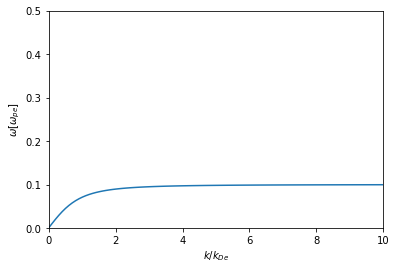

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def w(k):
    c_s = 0.1
    k_De = 1
    w = k*k_De*c_s/np.sqrt(1+(k)**2)
    return w

ks = np.linspace(0,10,100)
ws = w(ks)

plt.plot(ks,ws)
plt.xlabel('$k/k_{De}$')
plt.ylabel('$\omega [\omega_{pe}]$')
plt.ylim(0,0.5)
plt.xlim(0,10)

Notice a couple key aspects of the dispersion relation...

## Simulations using UPIC-ES

Now try running some simulations using the PIC code UPIC-ES.  We'll use the simulation to generate dispersion relations for a few different cases, and see how the results compare to our fluid theory.

### IAW from Natural Noise

$\textbf{Case 1: Cold Ions}$  
First, we'll run a case where the ions are cold compared to the electrons by setting $T_e/T_i = 100$.  Recalling what we learned in the introduction, we see that in this case $\bar{v}_e \approx 400  \ \bar{v}_i$.  That is, the electron distribution is super flat compared to the ion distribution.  Run the cell below to see just how flat "flat" is.

(-300, 300)

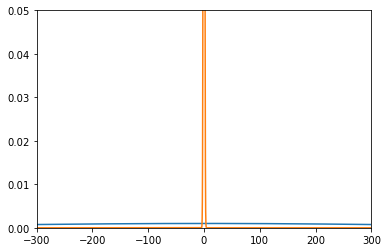

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f_e(v):
    vbe = 400    # electron thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbe**2) * np.exp(-v**2/(2*vbe**2))
    return f

def f_i(v):
    vbi = 1      # ion thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbi**2) * np.exp(-v**2/(2*vbi**2))
    return f

vmax = 300
v = np.linspace(-vmax,vmax,100000)
f_e = f_e(v)
f_i = f_i(v)
plt.plot(v,f_e)
plt.plot(v,f_i)
plt.ylim(0,0.05)
plt.xlim(-vmax,vmax)

Indeed it is very flat, you can't even make out the curvature in the electron distribution, even when we cut off the top of the ion distribution! Now, run the simulation. Be aware, this could take 10-15 minutes.

In [1]:
import sys                                    # comment out in main version
sys.path.insert(0, '/home/jovyan/analysis')   # comment out in main version
import osiris
import osh5io
import osh5vis
dirname = 'warmions'
osiris.run_upic_es(rundir=dirname, inputfile='warmions.in')

(<matplotlib.image.AxesImage at 0x7feb3423f710>,
 <matplotlib.colorbar.Colorbar at 0x7feb34360e10>)

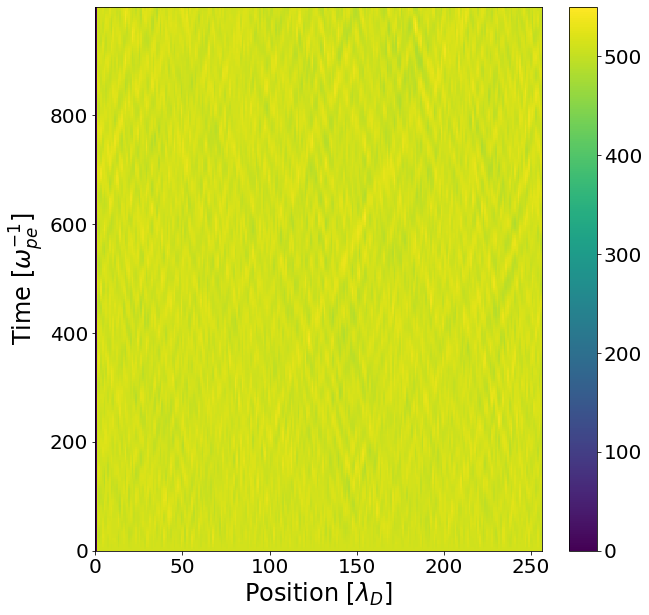

In [12]:
test=osiris.read('coldions')
import matplotlib.pyplot as plt
import osh5io
import osh5vis
import h5_utilities
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(10,10))
plt.xlabel('Position [$\lambda_D$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')
h5_utilities.plotme(test.ions)

Once the simulation is complete.  Execute the next cell to plot the dispersion function generated by the simulation.  

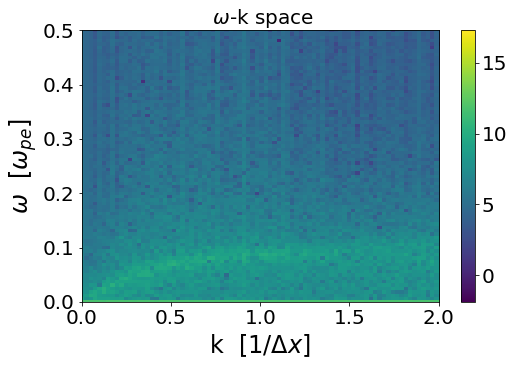

In [8]:
osiris.wk_upic_iaw(rundir='coldions', field='ions', wlim=[0,0.5], klim=[0,2], vtx=2.0, show_theory=False)

That looks strangely familiar.  Try plotting it again with the theory curve you generated before plotted on top.

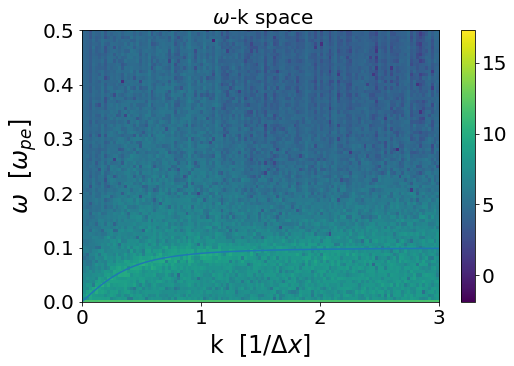

In [10]:
osiris.wk_upic_iaw(rundir='coldions', field='ions', wlim=[0,0.5], klim=[0,3], vtx=2.0, show_theory=True)

Amazing!  Seems like our fluid theory is doing a pretty great job.  Lets try changing up the parameters just to make sure it's really as great as we think it is.

$\textbf{Case 2: Warm Ions}$  
This time, we'll run a case where the ions are a bit warmer compared to the electrons.  We'll set $T_e/T_i = 20$.  This time, then, we'll have $\bar{v}_e \approx 40 \sqrt{20}  \ \bar{v}_i$.  Plot the distribution functions for this case in the cell below.

(-300, 300)

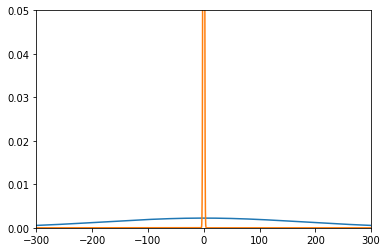

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f_e(v):
    vbe = 40*np.sqrt(20)       # electron thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbe**2) * np.exp(-v**2/(2*vbe**2))
    return f

def f_i(v):
    vbi = 1      # ion thermal velocity
    f = 1.0/np.sqrt(2*np.pi*vbi**2) * np.exp(-v**2/(2*vbi**2))
    return f

vmax = 300
v = np.linspace(-vmax,vmax,10000)
f_e = f_e(v)
f_i = f_i(v)
plt.plot(v,f_e)
plt.plot(v,f_i)
plt.ylim(0,0.05)
plt.xlim(-vmax,vmax)

The electron distribution is still pretty flat, but the hump is definitely now more noticeable. Guided by fluid theory, we expect that the sound speed, $c_s = \sqrt{ZT_e/M}$, will decrease as we decrease $T_e$.  Let's see if this is indeed the case by running the simulation.

In [6]:
dirname = 'warmions'
osiris.run_upic_es(rundir=dirname, inputfile='warmions.in')

runbeps completed normally


Again, this may take a while.  Once it's complete, try plotting the dispersion realation along with our fluid theory prediction.

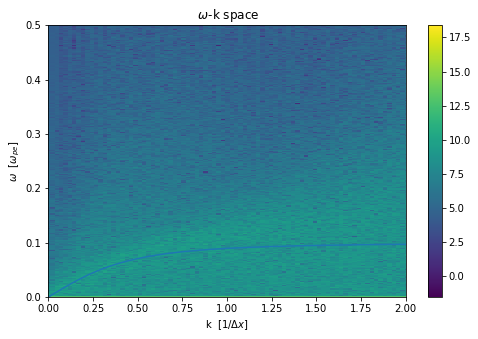

In [15]:
osiris.wk_upic_iaw(rundir='warmions', field='ions', wlim=[0,0.5], klim=[0,2], vtx=2.0, show_theory=True)

Clearly the agreement isn't so good anymore.  While the general shape of the fluid theory curve is still there, it looks washed out - far from the clean line fluid theory predicted.  Something is definitely wrong here.  Can you think what the problem might be?  Go back to the derivation and think about the assumptions we made?  Do they hold in this case?

### Driven IAW

Here the plasma conditions are the same as above, except that we drive the IAW very close to the dispersion curve to look at the plasma's response to the external driver.  In this case, the system is driven at mode 12 $k \Delta x = 0.294$, the driver's frequency is $\omega_0/\omega_{pe} = 0.06$ which sits near the fluid dispersion curve.  The period of the wave is roughly $105 /\omega_{pe}$ and the external driver is left on for $ 100/\omega_{pe}$.  The amplitude of the external driver is $0.075$.  

$\textbf{Case 1: Cold Ions}$  
First, we'll run a case where the ions are cold compared to the electrons by setting $T_e/T_i = 100$.  Recalling what we learned in the introduction, we see that in this case $\bar{v}_e \approx 400  \ \bar{v}_i$.  That is, the electron distribution is super flat compared to the ion distribution.  Run the cell below to see just how flat "flat" is.

In [17]:
dirname = 'driven-cold'
osiris.run_upic_es(rundir=dirname, inputfile='driven-cold.in')

run_upic_es completed normally


Now let's look at the ion response.

(<matplotlib.image.AxesImage at 0x7feb34550210>,
 <matplotlib.colorbar.Colorbar at 0x7feb34536d50>)

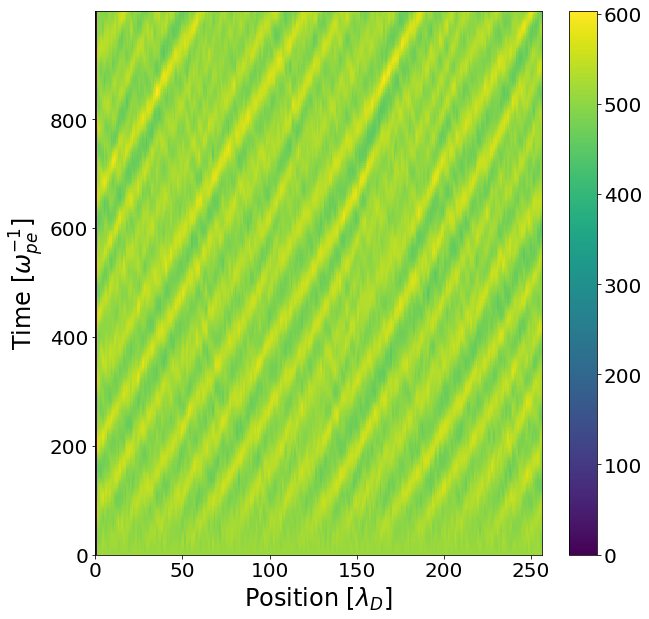

In [21]:
cold_data=osiris.read('driven-cold')
import osh5io
import osh5vis
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.figure(figsize=(10,10))
plt.xlabel('Position [$\lambda_D$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')
h5_utilities.plotme(cold_data.ions)

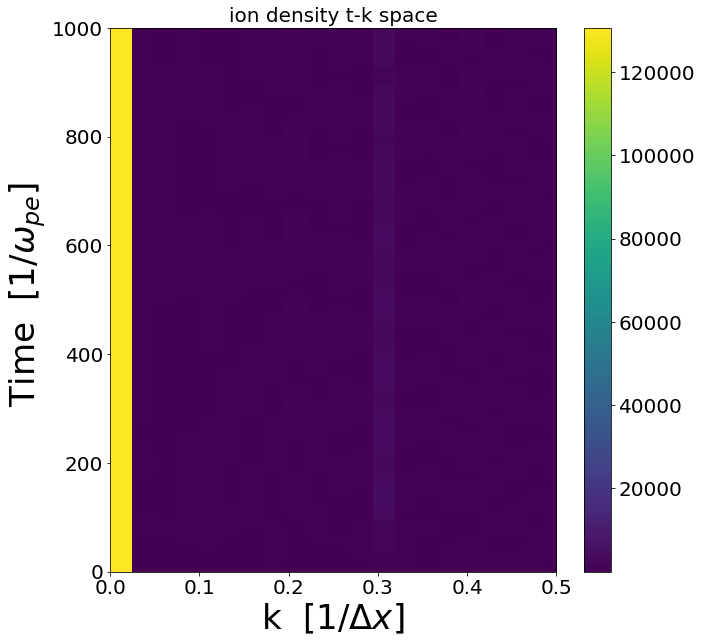

In [22]:
osiris.plot_tk_arb('driven-cold','ions',title='ion density',tlim=1000,klim=0.5)

# plt.plot(test.ions.data[:,12]-512)

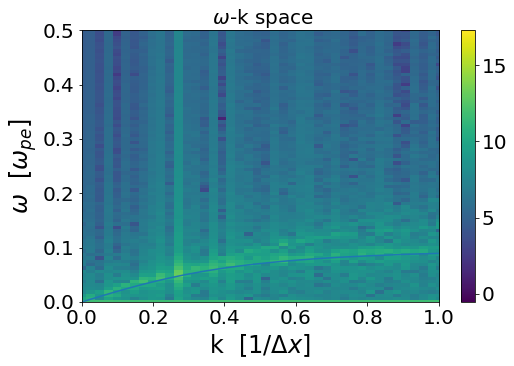

In [24]:
osiris.wk_upic_iaw(rundir='driven-cold', field='ions', wlim=[0,0.5], klim=[0,1], vtx=2.0, show_theory=True)

#### 𝐂𝐚𝐬𝐞 2: Warm 𝐈𝐨𝐧𝐬 
First, we'll run a case where the ions are cold compared to the electrons by setting 𝑇𝑒/𝑇𝑖=9. Recalling what we learned in the introduction, we see that in this case 𝑣¯𝑒≈400 𝑣¯𝑖. That is, the electron distribution is super flat compared to the ion distribution. Run the cell below to see just how flat "flat" is.

In [26]:
dirname = 'driven-warm'
osiris.run_upic_es(rundir=dirname, inputfile='driven-warm.in')

run_upic_es completed normally


Now let's look at the ion response.

(<matplotlib.image.AxesImage at 0x7feb350d9b90>,
 <matplotlib.colorbar.Colorbar at 0x7feb34ff4210>)

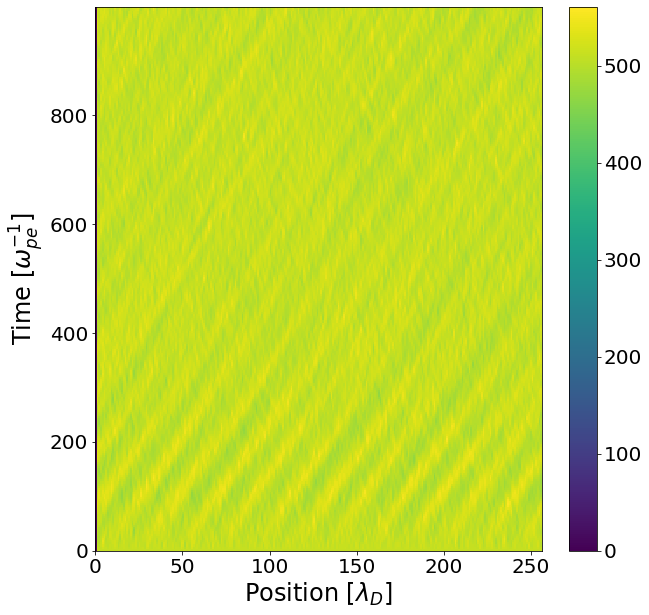

In [27]:
warm_data=osiris.read('driven-warm')
import osh5io
import osh5vis
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.figure(figsize=(10,10))
plt.xlabel('Position [$\lambda_D$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')
h5_utilities.plotme(warm_data.ions)

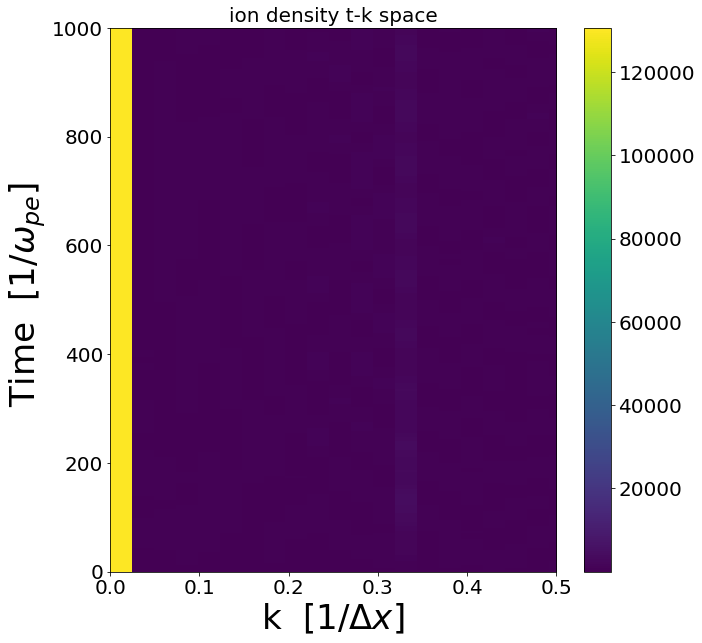

In [78]:
osiris.plot_tk_arb('driven-warm','ions',title='ion density',tlim=1000,klim=0.5)

# plt.plot(test.ions.data[:,12]-512)

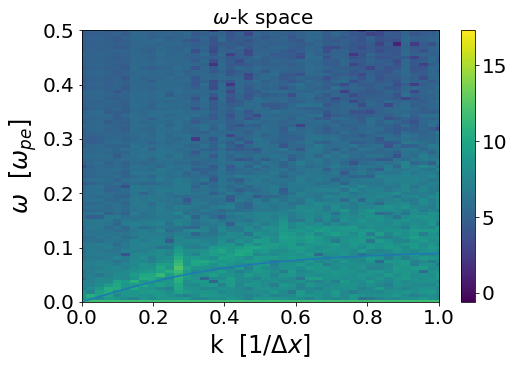

In [29]:
osiris.wk_upic_iaw(rundir='driven-warm', field='ions', wlim=[0,0.5], klim=[0,1], vtx=2.0, show_theory=True)